In [16]:
import numpy as np

In [18]:
import pandas as pd

In [20]:
import matplotlib.pyplot as plt

In [21]:
import seaborn as sns

In [22]:
dfhrt = pd.read_csv(r"C:\Users\DELL\Downloads\heart.csv")

In [23]:
dfhrt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [24]:
dfhrt.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [25]:
dfhrt.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [27]:
dfhrt["target"].unique()

array([1, 0], dtype=int64)

In [28]:
dfhrt["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [29]:
dfhrt.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###  Detect errors

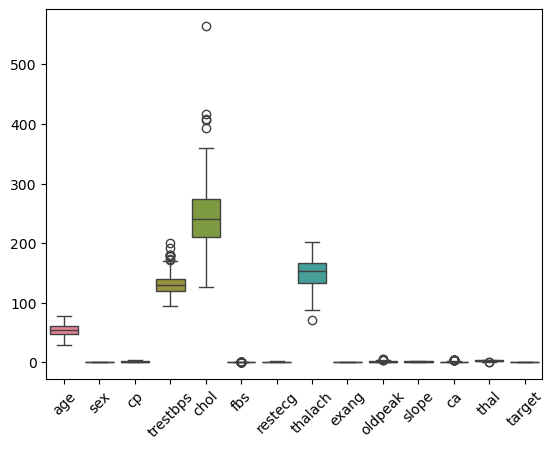

In [33]:
sns.boxplot(dfhrt)
plt.xticks(rotation = 45)
plt.show()

In [40]:
dfhrt.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [41]:
cols = ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak',  'ca', 'thal']

In [42]:
cols

['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

In [43]:
for c in cols:
    print(dfhrt[c])

0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trestbps, Length: 303, dtype: int64
0      233
1      250
2      204
3      236
4      354
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 303, dtype: int64
0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64
0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64
0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302    0.0
Name: oldpeak, Length: 303, dtype: float64
0      0
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    2
301    1
302    1
Name: ca, Length: 303, dtype: int64
0      1
1      2
2      2
3      2
4      2
      ..
298    3
299    3
300    3


In [44]:
for c in cols :
    sk = dfhrt[c].skew().round()
    if sk ==0 or sk == -0:
        m = dfhrt[c].mean()
        s = dfhrt[c].std()
        lowerlimit = m - 3*s
        upperlimit = m + 3*s
        dfhrt[c] = dfhrt[c].map(lambda x : lowerlimit if x < lowerlimit else upperlimit if x > upperlimit else x)
    else: 
        q1 = dfhrt[c].quantile(0.25)
        q3 = dfhrt[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - (1.5 * iqr)
        upper = q3 + (1.5 * iqr)
        dfhrt[c] = dfhrt[c].map(lambda x : lower if x < lower else upper if x > upper else x)        

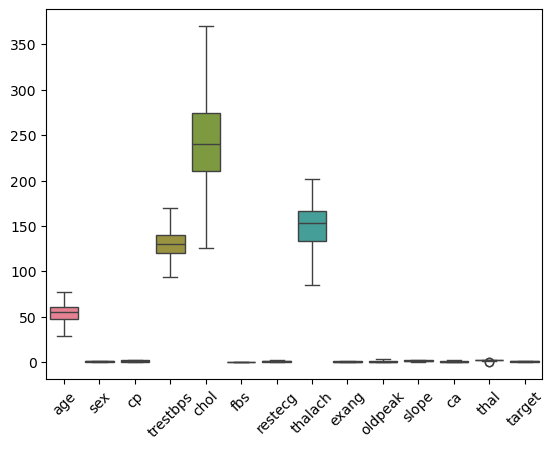

In [46]:
sns.boxplot(dfhrt)
plt.xticks(rotation = 45)
plt.show()

### Encoding

In [53]:
dfhrt.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

### Imbalance

In [55]:
dfhrt["target"]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [56]:
dfhrt["target"].unique()

array([1, 0], dtype=int64)

In [57]:
dfhrt["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

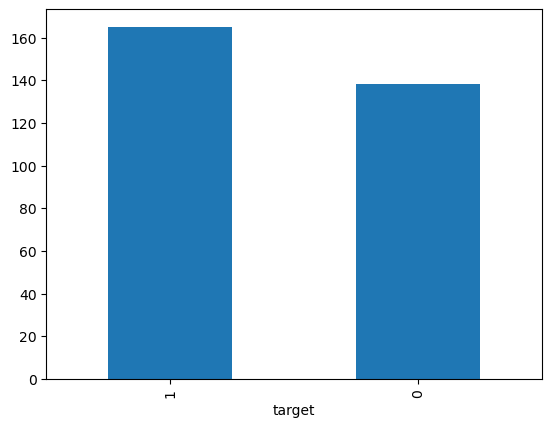

In [59]:
dfhrt["target"].value_counts().plot(kind = "bar")

### Data Seperation

In [65]:
dfhrt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,1


In [67]:
x = dfhrt.drop("target", axis = 1)

In [70]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0
299,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0
300,68,1,0,144.0,193.0,0.0,1,141.0,0,3.4,1,2.0,3.0
301,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0


In [72]:
y = dfhrt["target"]

In [74]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### data splitting

In [77]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 2)

In [81]:
x.shape, x_train.shape, x_test.shape

((303, 13), (242, 13), (61, 13))

In [83]:
y.shape, y_train.shape, y_test.shape

((303,), (242,), (61,))

### creating Model

In [86]:
from sklearn.svm import SVC

In [88]:
svm_model = SVC()

In [90]:
svm_model

SVC()

In [92]:
svm_model.fit(x_train,y_train)

SVC()

In [94]:
svm_model.score(x_test, y_test)

0.6885245901639344

In [96]:
slist = []
for i in range(1000):
    x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = i)
    svc = SVC()
    svc.fit(x_train,y_train)
    s = svc.score(x_test, y_test)
    slist.append(s)
m = max(slist)
print(m, end = "==>")
print(slist.index(m))

0.8524590163934426==>907


### Corss Validation

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
dtree = DecisionTreeClassifier()

In [101]:
dtree

DecisionTreeClassifier()

In [110]:
score = cross_val_score (dtree, x, y, cv=20, n_jobs = -1 )

In [112]:
score

array([0.8125    , 0.75      , 0.875     , 0.73333333, 0.8       ,
       1.        , 0.73333333, 0.8       , 1.        , 0.8       ,
       0.73333333, 0.66666667, 0.86666667, 0.66666667, 0.66666667,
       0.8       , 0.66666667, 0.66666667, 0.86666667, 0.8       ])

In [114]:
score.mean()

0.7852083333333333